In [159]:
list_of_Trainloss=[0,0,0,0,0,0,0,0,0,0]
list_of_Validloss=[0,0,0,0,0,0,0,0,0,0]


In [289]:
N_list=[4000,8000,12000,16000,20000,24000,28000,32000,36000,40000]
import matplotlib.pyplot as plt
import numpy as np
# number of data
N=40000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


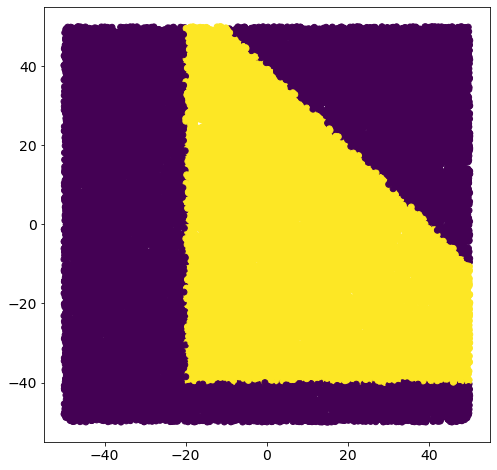

In [290]:
%run nonlinear_function.py

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [291]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py

# training data
perc_train = 0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 40000
train: 32000


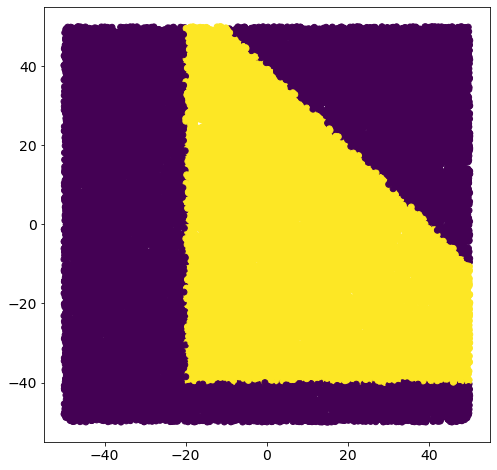

In [292]:
#keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

#dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [293]:
(x_train, y_train) = (x[0:N_train] , y[0:N_train])
(x_valid, y_valid) = (x[N_train:] , y[N_train:])
print('Train:',len(x_train),'\t Validation:',len(x_valid))

Train: 32000 	 Validation: 8000


In [294]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [295]:
#reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(3,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 2)                 6         
                                                                 
 dense_85 (Dense)            (None, 20)                60        
                                                                 
 dense_86 (Dense)            (None, 20)                420       
                                                                 
 dropout_21 (Dropout)        (None, 20)                0         
                                                                 
 dense_87 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [296]:
model.compile(loss='binary_crossentropy',
             #optimizer='RMSprop'
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
640/640 - 1s - loss: 0.5649 - accuracy: 0.7465 - val_loss: 0.3603 - val_accuracy: 0.9034 - 1s/epoch - 2ms/step
Epoch 2/400
640/640 - 1s - loss: 0.3144 - accuracy: 0.9002 - val_loss: 0.2628 - val_accuracy: 0.9222 - 765ms/epoch - 1ms/step
Epoch 3/400
640/640 - 1s - loss: 0.2665 - accuracy: 0.9159 - val_loss: 0.2431 - val_accuracy: 0.9145 - 748ms/epoch - 1ms/step
Epoch 4/400
640/640 - 1s - loss: 0.2500 - accuracy: 0.9198 - val_loss: 0.2311 - val_accuracy: 0.9230 - 730ms/epoch - 1ms/step
Epoch 5/400
640/640 - 1s - loss: 0.2416 - accuracy: 0.9223 - val_loss: 0.2271 - val_accuracy: 0.9220 - 741ms/epoch - 1ms/step
Epoch 6/400
640/640 - 1s - loss: 0.2361 - accuracy: 0.9242 - val_loss: 0.2249 - val_accuracy: 0.9179 - 889ms/epoch - 1ms/step
Epoch 7/400
640/640 - 1s - loss: 0.2341 - accuracy: 0.9257 - val_loss: 0.2216 - val_accuracy: 0.9219 - 889ms/epoch - 1ms/step
Epoch 8/400
640/640 - 1s - loss: 0.2296 - accuracy: 0.9264 - val_loss: 0.2216 - val_accuracy: 0.9269 - 1s/epoch - 2ms/ste

Epoch 66/400
640/640 - 1s - loss: 0.2148 - accuracy: 0.9297 - val_loss: 0.2089 - val_accuracy: 0.9275 - 719ms/epoch - 1ms/step
Epoch 67/400
640/640 - 1s - loss: 0.2148 - accuracy: 0.9294 - val_loss: 0.2096 - val_accuracy: 0.9273 - 716ms/epoch - 1ms/step
Epoch 68/400
640/640 - 1s - loss: 0.2146 - accuracy: 0.9294 - val_loss: 0.2111 - val_accuracy: 0.9264 - 714ms/epoch - 1ms/step
Epoch 69/400
640/640 - 1s - loss: 0.2141 - accuracy: 0.9292 - val_loss: 0.2086 - val_accuracy: 0.9277 - 717ms/epoch - 1ms/step
Epoch 70/400
640/640 - 1s - loss: 0.2148 - accuracy: 0.9290 - val_loss: 0.2100 - val_accuracy: 0.9260 - 719ms/epoch - 1ms/step
Epoch 71/400
640/640 - 1s - loss: 0.2162 - accuracy: 0.9293 - val_loss: 0.2089 - val_accuracy: 0.9273 - 709ms/epoch - 1ms/step
Epoch 72/400
640/640 - 1s - loss: 0.2143 - accuracy: 0.9295 - val_loss: 0.2113 - val_accuracy: 0.9255 - 716ms/epoch - 1ms/step
Epoch 73/400
640/640 - 1s - loss: 0.2153 - accuracy: 0.9293 - val_loss: 0.2081 - val_accuracy: 0.9276 - 718ms/e

Epoch 131/400
640/640 - 1s - loss: 0.2139 - accuracy: 0.9298 - val_loss: 0.2073 - val_accuracy: 0.9283 - 714ms/epoch - 1ms/step
Epoch 132/400
640/640 - 1s - loss: 0.2163 - accuracy: 0.9286 - val_loss: 0.2096 - val_accuracy: 0.9260 - 716ms/epoch - 1ms/step
Epoch 133/400
640/640 - 1s - loss: 0.2149 - accuracy: 0.9298 - val_loss: 0.2095 - val_accuracy: 0.9266 - 718ms/epoch - 1ms/step
Epoch 134/400
640/640 - 1s - loss: 0.2150 - accuracy: 0.9294 - val_loss: 0.2075 - val_accuracy: 0.9280 - 715ms/epoch - 1ms/step
Epoch 135/400
640/640 - 1s - loss: 0.2141 - accuracy: 0.9295 - val_loss: 0.2094 - val_accuracy: 0.9258 - 718ms/epoch - 1ms/step
Epoch 136/400
640/640 - 1s - loss: 0.2155 - accuracy: 0.9292 - val_loss: 0.2101 - val_accuracy: 0.9264 - 707ms/epoch - 1ms/step
Epoch 137/400
640/640 - 1s - loss: 0.2145 - accuracy: 0.9289 - val_loss: 0.2097 - val_accuracy: 0.9261 - 717ms/epoch - 1ms/step
Epoch 138/400
640/640 - 1s - loss: 0.2145 - accuracy: 0.9292 - val_loss: 0.2084 - val_accuracy: 0.9275 -

640/640 - 1s - loss: 0.2089 - accuracy: 0.9260 - val_loss: 0.2071 - val_accuracy: 0.9281 - 719ms/epoch - 1ms/step
Epoch 196/400
640/640 - 1s - loss: 0.2084 - accuracy: 0.9266 - val_loss: 0.2120 - val_accuracy: 0.9266 - 722ms/epoch - 1ms/step
Epoch 197/400
640/640 - 1s - loss: 0.2103 - accuracy: 0.9253 - val_loss: 0.2086 - val_accuracy: 0.9270 - 714ms/epoch - 1ms/step
Epoch 198/400
640/640 - 1s - loss: 0.2096 - accuracy: 0.9254 - val_loss: 0.2078 - val_accuracy: 0.9275 - 708ms/epoch - 1ms/step
Epoch 199/400
640/640 - 1s - loss: 0.2088 - accuracy: 0.9257 - val_loss: 0.2101 - val_accuracy: 0.9258 - 714ms/epoch - 1ms/step
Epoch 200/400
640/640 - 1s - loss: 0.2099 - accuracy: 0.9258 - val_loss: 0.2079 - val_accuracy: 0.9275 - 748ms/epoch - 1ms/step
Epoch 201/400
640/640 - 1s - loss: 0.2109 - accuracy: 0.9245 - val_loss: 0.2114 - val_accuracy: 0.9258 - 754ms/epoch - 1ms/step
Epoch 202/400
640/640 - 1s - loss: 0.2093 - accuracy: 0.9258 - val_loss: 0.2104 - val_accuracy: 0.9269 - 808ms/epoch -

Epoch 260/400
640/640 - 1s - loss: 0.2109 - accuracy: 0.9249 - val_loss: 0.2076 - val_accuracy: 0.9281 - 744ms/epoch - 1ms/step
Epoch 261/400
640/640 - 1s - loss: 0.2097 - accuracy: 0.9255 - val_loss: 0.2082 - val_accuracy: 0.9269 - 765ms/epoch - 1ms/step
Epoch 262/400
640/640 - 1s - loss: 0.2090 - accuracy: 0.9260 - val_loss: 0.2084 - val_accuracy: 0.9274 - 738ms/epoch - 1ms/step
Epoch 263/400
640/640 - 1s - loss: 0.2087 - accuracy: 0.9260 - val_loss: 0.2082 - val_accuracy: 0.9273 - 740ms/epoch - 1ms/step
Epoch 264/400
640/640 - 1s - loss: 0.2082 - accuracy: 0.9261 - val_loss: 0.2086 - val_accuracy: 0.9276 - 737ms/epoch - 1ms/step
Epoch 265/400
640/640 - 1s - loss: 0.2086 - accuracy: 0.9263 - val_loss: 0.2103 - val_accuracy: 0.9260 - 738ms/epoch - 1ms/step
Epoch 266/400
640/640 - 1s - loss: 0.2094 - accuracy: 0.9259 - val_loss: 0.2078 - val_accuracy: 0.9276 - 745ms/epoch - 1ms/step
Epoch 267/400
640/640 - 1s - loss: 0.2088 - accuracy: 0.9263 - val_loss: 0.2083 - val_accuracy: 0.9269 -

640/640 - 1s - loss: 0.2092 - accuracy: 0.9257 - val_loss: 0.2069 - val_accuracy: 0.9281 - 707ms/epoch - 1ms/step
Epoch 325/400
640/640 - 1s - loss: 0.2097 - accuracy: 0.9254 - val_loss: 0.2073 - val_accuracy: 0.9279 - 718ms/epoch - 1ms/step
Epoch 326/400
640/640 - 1s - loss: 0.2089 - accuracy: 0.9262 - val_loss: 0.2092 - val_accuracy: 0.9266 - 715ms/epoch - 1ms/step
Epoch 327/400
640/640 - 1s - loss: 0.2091 - accuracy: 0.9258 - val_loss: 0.2094 - val_accuracy: 0.9269 - 717ms/epoch - 1ms/step
Epoch 328/400
640/640 - 1s - loss: 0.2095 - accuracy: 0.9258 - val_loss: 0.2115 - val_accuracy: 0.9244 - 713ms/epoch - 1ms/step
Epoch 329/400
640/640 - 1s - loss: 0.2094 - accuracy: 0.9261 - val_loss: 0.2075 - val_accuracy: 0.9280 - 721ms/epoch - 1ms/step
Epoch 330/400
640/640 - 1s - loss: 0.2093 - accuracy: 0.9262 - val_loss: 0.2090 - val_accuracy: 0.9264 - 719ms/epoch - 1ms/step
Epoch 331/400
640/640 - 1s - loss: 0.2075 - accuracy: 0.9267 - val_loss: 0.2071 - val_accuracy: 0.9283 - 716ms/epoch -

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.savefig('plot_of _increase' + str(N_list.index(N)) + '.png')
list_of_Trainloss[N_list.index(N)]=fit.history['loss'][-1]
list_of_Validloss[N_list.index(N)]=fit.history['val_loss'][-1]


In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
plt.savefig('result_of _increase' + str(N_list.index(N)) + '.png')
print(N_list.index(N))

In [ ]:
print(list_of_Trainloss)
print(list_of_Validloss)
np.savetxt(filename("Trainloss_increase",TYPE),list_of_Trainloss)
np.savetxt(filename("Validloss_increase",TYPE),list_of_Validloss)


In [ ]:
plt.plot(list_of_Trainloss)
plt.plot(list_of_Validloss)

plt.savefig('plot_increase.png')
